In [1]:
import tensorflow as tf
import numpy as np
import PIL
from matplotlib import pyplot as plt


2025-06-25 18:42:18.437203: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-25 18:42:19.539992: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-25 18:42:20.004739: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750887740.533639   53017 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750887740.677975   53017 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1750887741.913223   53017 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [7]:
import pathlib

In [ ]:
arquivos = []
diretorio = pathlib.Path('Arquivos/imagens/bloodcells_dataset')
for pasta in diretorio.iterdir():
    if pasta.is_dir():
        print(f'classe - {pasta.name}')
        for arquivo in pasta.iterdir(): 
            arquivos.append(arquivo),0
            


classe - neutrophil
Arquivos/imagens/bloodcells_dataset/neutrophil/SNE_122865.jpg
Arquivos/imagens/bloodcells_dataset/neutrophil/BNE_949188.jpg
Arquivos/imagens/bloodcells_dataset/neutrophil/BNE_38320.jpg
Arquivos/imagens/bloodcells_dataset/neutrophil/SNE_989373.jpg
Arquivos/imagens/bloodcells_dataset/neutrophil/SNE_583310.jpg
Arquivos/imagens/bloodcells_dataset/neutrophil/SNE_402177.jpg
Arquivos/imagens/bloodcells_dataset/neutrophil/BNE_128511.jpg
Arquivos/imagens/bloodcells_dataset/neutrophil/BNE_956356.jpg
Arquivos/imagens/bloodcells_dataset/neutrophil/BNE_311194.jpg
Arquivos/imagens/bloodcells_dataset/neutrophil/BNE_277907.jpg
Arquivos/imagens/bloodcells_dataset/neutrophil/BNE_944885.jpg
Arquivos/imagens/bloodcells_dataset/neutrophil/SNE_111548.jpg
Arquivos/imagens/bloodcells_dataset/neutrophil/SNE_48537.jpg
Arquivos/imagens/bloodcells_dataset/neutrophil/SNE_632812.jpg
Arquivos/imagens/bloodcells_dataset/neutrophil/BNE_933305.jpg
Arquivos/imagens/bloodcells_dataset/neutrophil/BNE_1

In [42]:
input_size = np.array(PIL.Image.open(arquivos[0])).shape

In [51]:
input_size

(363, 360, 3)

In [48]:
SEED = 541

In [53]:
dados_treinamento = tf.keras.utils.image_dataset_from_directory(
    diretorio,
    validation_split=0.2,
    subset='training',
    seed= SEED,
    image_size=(input_size[0], input_size[1]),
    batch_size=32,
    shuffle=True
)

dados_validacao = tf.keras.utils.image_dataset_from_directory(
    diretorio,
    validation_split=0.2,
    subset='validation',
    seed= SEED,
    image_size=(input_size[0], input_size[1]),
    batch_size=32,
    shuffle=True
)

Found 17092 files belonging to 8 classes.
Using 13674 files for training.
Found 17092 files belonging to 8 classes.
Using 3418 files for validation.


In [ ]:
modelo = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=input_size),
        tf.keras.layers.Rescaling(1./360),
        tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(8, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(8, activation='softmax')
    ])
# Compilando o modelo
modelo.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/home/geovane/Projetos/Notebooks/Keras/.venv/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [57]:
modelo.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 363, 360, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 361, 358, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 180, 179, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 178, 177, 8)    │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 89, 88, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 62656)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     8,020,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,022,736 (30.60 MB)

 Trainable params: 8,022,736 (30.60 MB)

 Non-trainable params: 0 (0.00 B)

In [54]:
def my_callback():
    class MyCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs=None):
            if logs.get('accuracy') > 0.90:
                print("\nAtingiu 90% de acurácia, interrompendo treinamento!")
                self.model.stop_training = True
    return MyCallback()

In [59]:
historico = modelo.fit(dados_treinamento,validation_data=dados_validacao, epochs=10, validation_split=0.2, verbose=1,callbacks=[my_callback()])

Epoch 1/10
428/428 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9443 - loss: 0.1699
Atingiu 90% de acurácia, interrompendo treinamento!
428/428 ━━━━━━━━━━━━━━━━━━━━ 824s 2s/step - accuracy: 0.9443 - loss: 0.1700 - val_accuracy: 0.9102 - val_loss: 0.2813


In [78]:
import pandas as pd


In [87]:
def load_image(image_path):
    diretorio = pathlib.Path(image_path)
    for pasta in diretorio.iterdir():
        class_name = {'classe':pasta.name,'arquivos':[arquivo for arquivo in pasta.iterdir()]}
    return pd.DataFrame(class_name)

In [88]:
imagens = load_image('Arquivos/imagens/bloodcells_dataset')

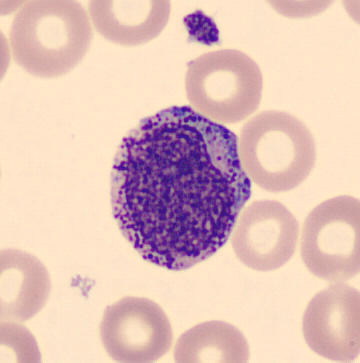

In [89]:
PIL.Image.open(imagens['arquivos'][0])

In [102]:
image = PIL.Image.open(imagens['arquivos'][0])
image = np.array(image, dtype=np.float32)
image = image / 360.0
image = np.expand_dims(image, axis=0)


In [106]:
modelo.predict(image).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


array([3])

In [117]:
import PIL.ImageShow


def predict_image(image_path):
    # Carrega a imagem
    PIL.ImageShow.show(PIL.Image.open(image_path))
    # Abre a imagem usando PIL
    image = PIL.Image.open(image_path)
    # Converte para array numpy e normaliza
    image = np.array(image, dtype=np.float32)
    image = image / 360.0
    # Expande as dimensões para incluir o batch size
    image = np.expand_dims(image, axis=0)
    # Faz a predição
    prediction = modelo.predict(image)
    nome_classe = dados_treinamento.class_names[prediction.argmax(axis=1)[0]]

    # Retorna a classe prevista
    return nome_classe 

In [121]:
predict_image(imagens['arquivos'][0])  # Exemplo de uso

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


'ig'

In [ ]:
tf.keras.models.save_model(modelo, 'modelo_celas_sanguineas.keras')